### Preprocessing

In [3]:
# import relevant statistical packages
import numpy as np
import pandas as pd

In [4]:
# import relevant data visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
%matplotlib inline

In [5]:
url = "/Users/arpanganguli/Documents/Professional/Finance/ISLR/Auto.csv"
Auto = pd.read_csv(url)

In [6]:
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [7]:
Auto.horsepower.dtype

dtype('O')

Text(0.5,1,"missing values in Auto['horsepower']")

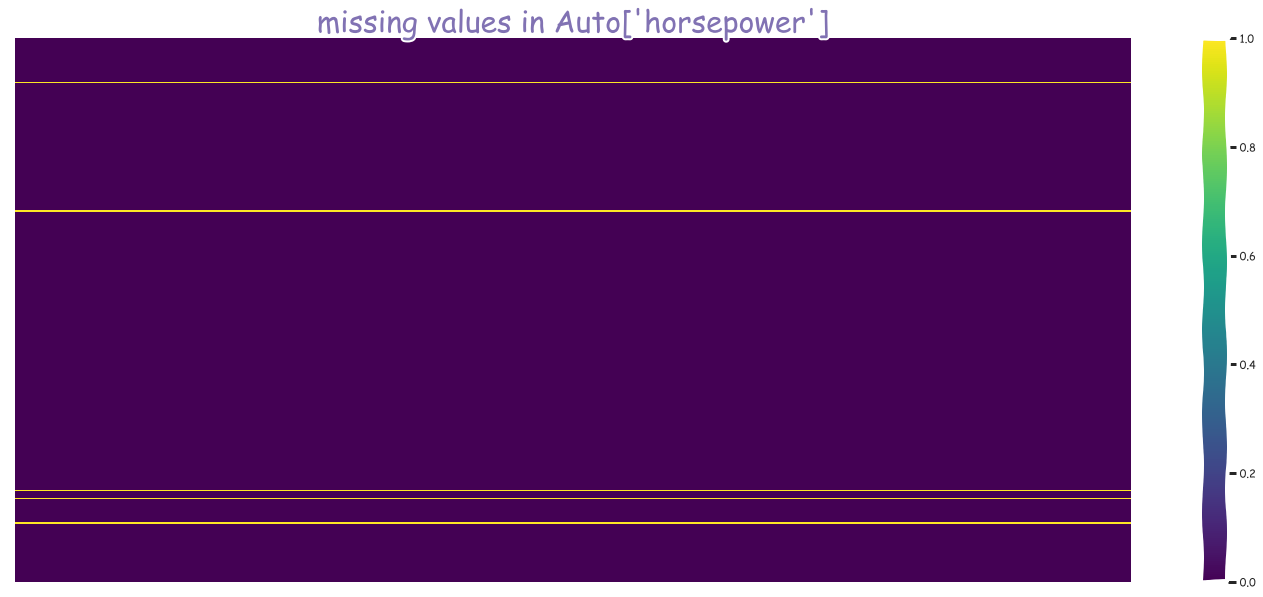

In [8]:
plt.xkcd()
plt.figure(figsize=(25, 10))
sns.heatmap(Auto[['horsepower']]=='?', yticklabels=False, xticklabels=False, cmap='viridis')
plt.title("missing values in Auto['horsepower']", fontsize=30, color='m')

In [9]:
Auto.loc[Auto.horsepower=="?"]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i


In [10]:
Auto.shape

(397, 9)

In [11]:
Auto.drop(index=[32, 126, 330, 336, 354], inplace=True)

In [12]:
Auto.shape

(392, 9)

*So,I have deleted the rows containing erroneous values of horsepower.*

Text(0.5,1,"missing values in Auto['horsepower']")

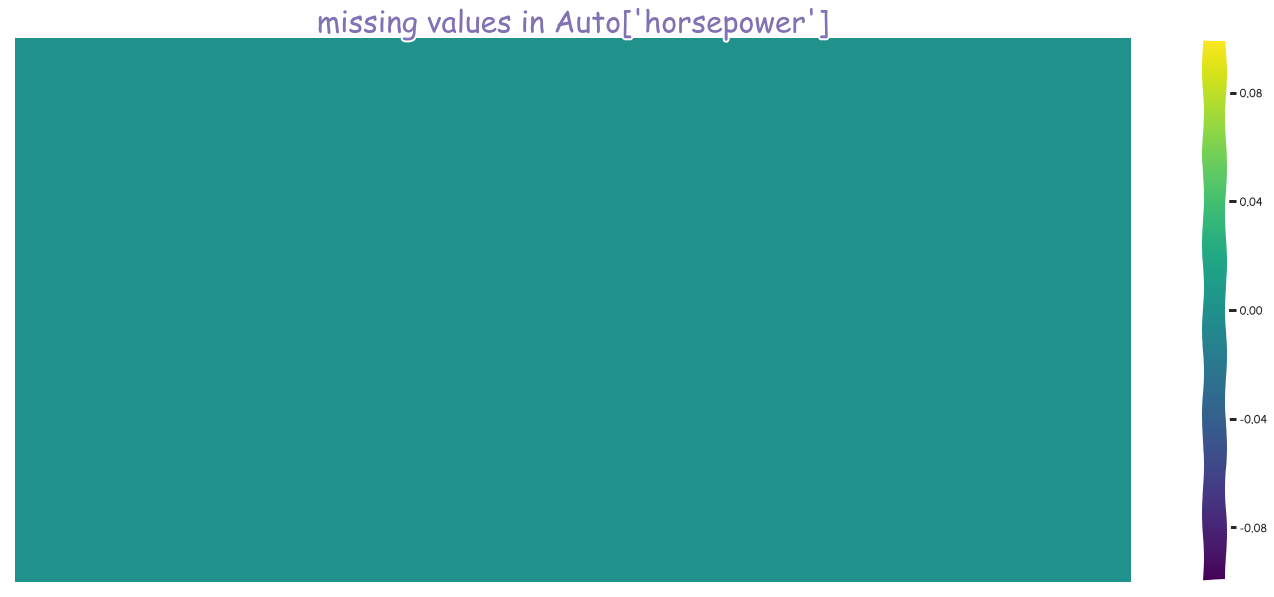

In [13]:
plt.xkcd()
plt.figure(figsize=(25, 10))
sns.heatmap(Auto[['horsepower']]=='?', yticklabels=False, xticklabels=False, cmap='viridis')
plt.title("missing values in Auto['horsepower']", fontsize=30, color='m')

*See, no missing values!*

In [14]:
Auto.corr()

,mpg,cylinders,displacement,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.932994,-0.543800,-0.369855,-0.614535
weight,-0.832244,0.897527,0.932994,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.585005,0.212746,0.181528,1.000000


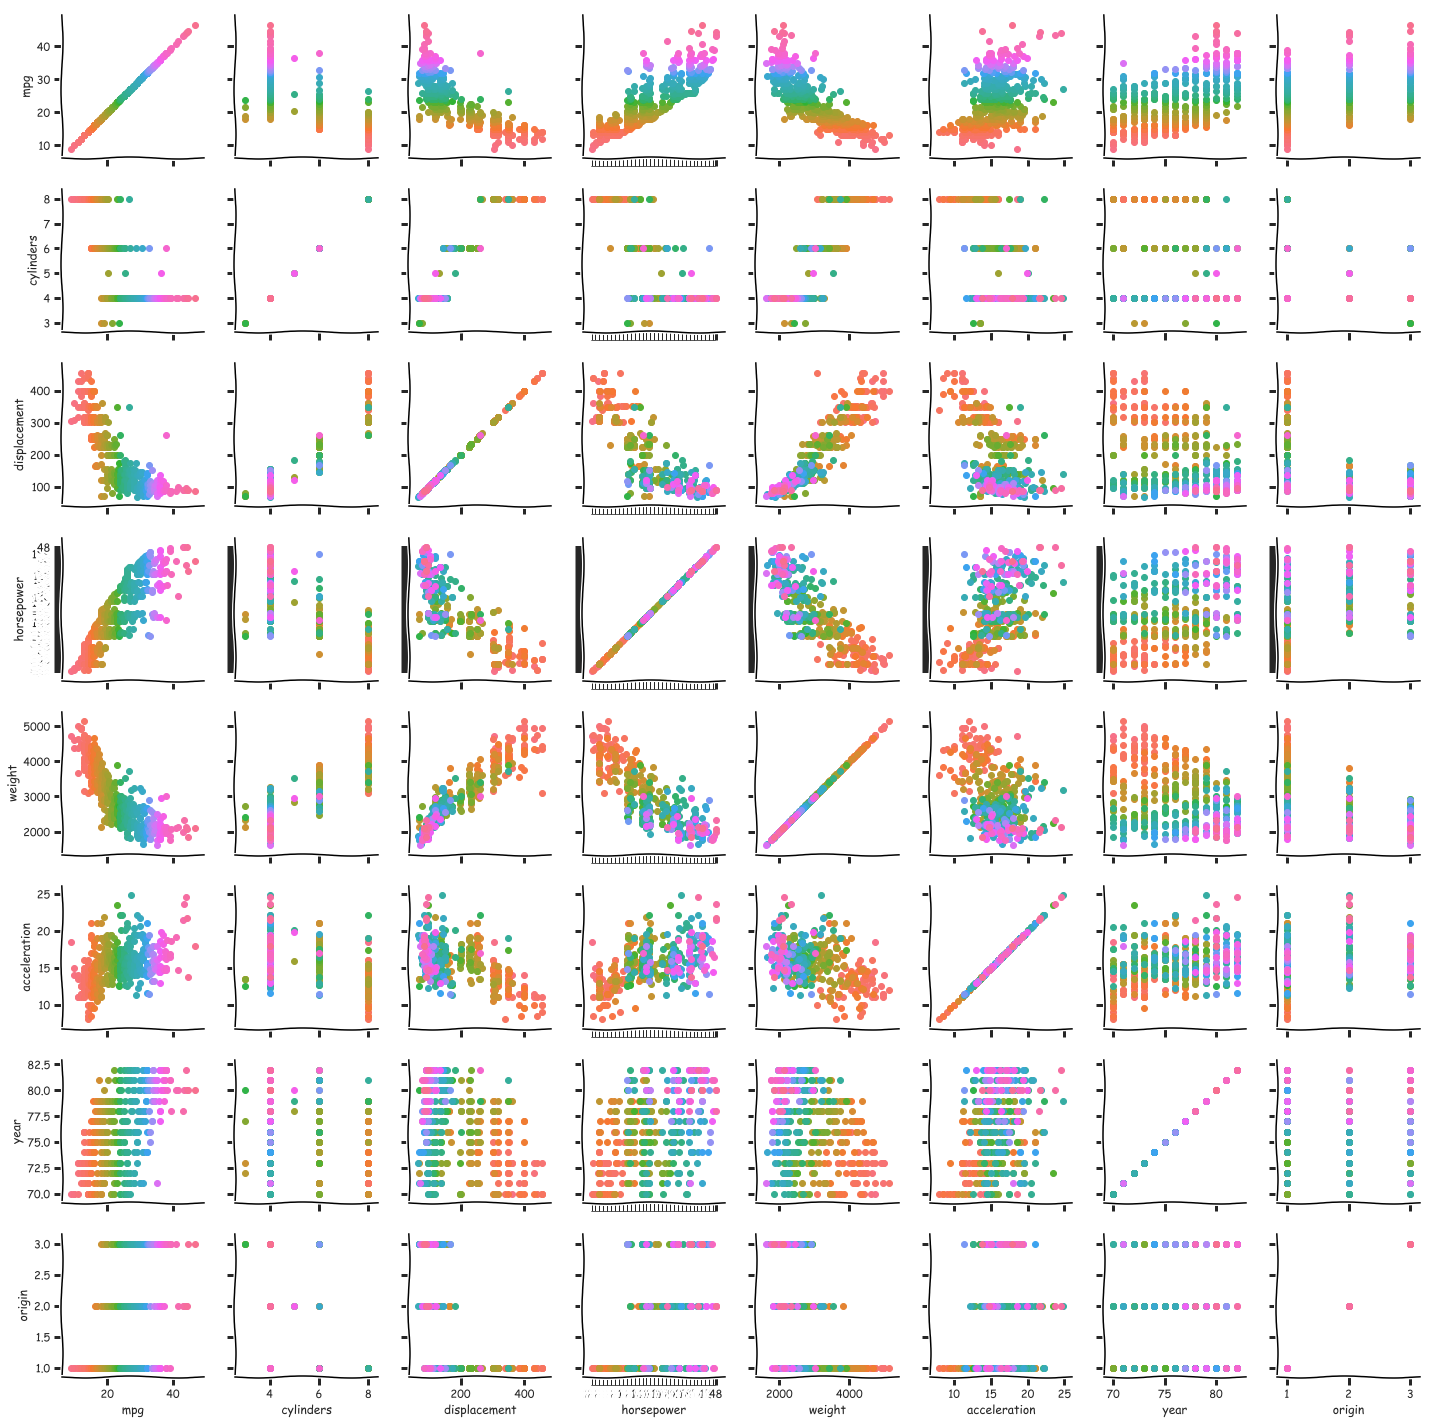

In [17]:
sns.PairGrid(Auto, hue='mpg').map(plt.scatter)

**From the pairplots, it appears that displacement, weight and acceleration have non-linear relationships with mpg.**

### Polynomial

In [253]:
from sklearn.model_selection import KFold as KF, cross_val_score as CVS
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.feature_selection import f_classif
import warnings
warnings.filterwarnings('ignore')

*Checking for non-linear relationship between mpg and displacement*

In [254]:
X = Auto[['displacement']]
y = Auto.mpg
df = pd.DataFrame()
MSEdf = pd.DataFrame()
anova_table = []
SCORE = []

for k in range(0,20):
    X_k = X**k
    dfX = df.append(X_k)
    df_a = np.array(dfX)
    lmk = LinearRegression().fit(df_a, y)
    err = pd.DataFrame([mean_squared_error(y, lmk.predict(df_a))])
    MSEdf = MSEdf.append(err)
    anova_table.append(f_classif(df_a, y))
    SCORE.append(lmk.score(df_a, y))
    
MSEdf.columns = ['MSE']
MSEdf.reset_index(drop=True, inplace=True)

anovadf = pd.DataFrame(anova_table)
anovadf.columns = ['f-value', 'p-value']

SCOREdf = pd.DataFrame(SCORE)
SCOREdf.columns = ['R^2']
SCOREdf.reset_index(drop=True, inplace=True)

Text(0,0.5,'MSE')

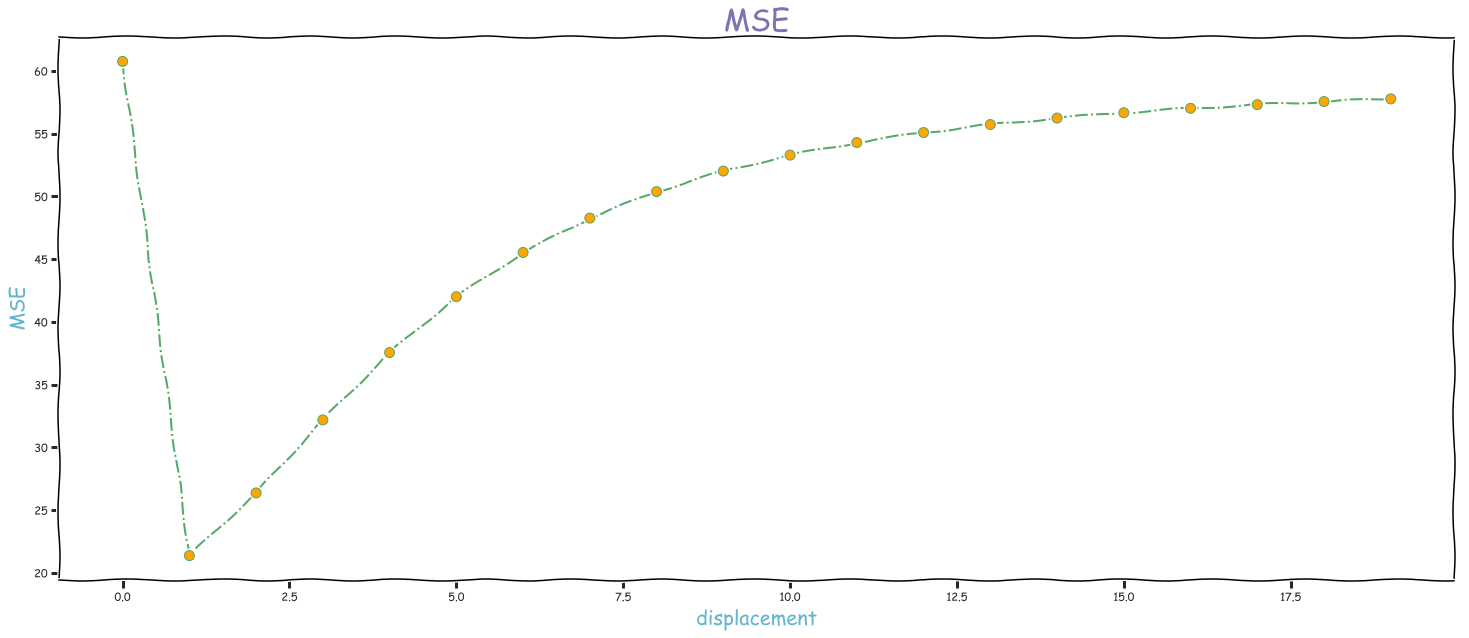

In [255]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.plot(MSEdf, color='g', ls = '-.', marker='o', markerfacecolor='orange', markersize=10)
plt.title("MSE", fontsize=30, color='m')
plt.xlabel("displacement", fontsize=20, color='c')
plt.ylabel("MSE", fontsize=20, color='c')

In [256]:
anovadf = pd.DataFrame(anova_table)
anovadf.columns = ['f-value', 'p-value']
anovadf

,f-value,p-value
0,[nan],[nan]
1,[12.88613823518622],[4.10755987957045e-66]
2,[9.852598310535562],[3.1467598330897717e-54]
3,[6.65349986744597],[1.795304398394192e-38]
4,[4.5197861271808115],[2.9443941813694515e-25]
5,[3.216490278910011],[7.410999108782362e-16]
6,[2.4072805040189005],[1.1795683460935113e-09]
7,[1.8848297733788066],[9.287720769631394e-06]
8,[1.533980567994572],[0.002035389088538488]
9,[1.2900093862158988],[0.04426166108526221]


Text(0,0.5,'R^2')

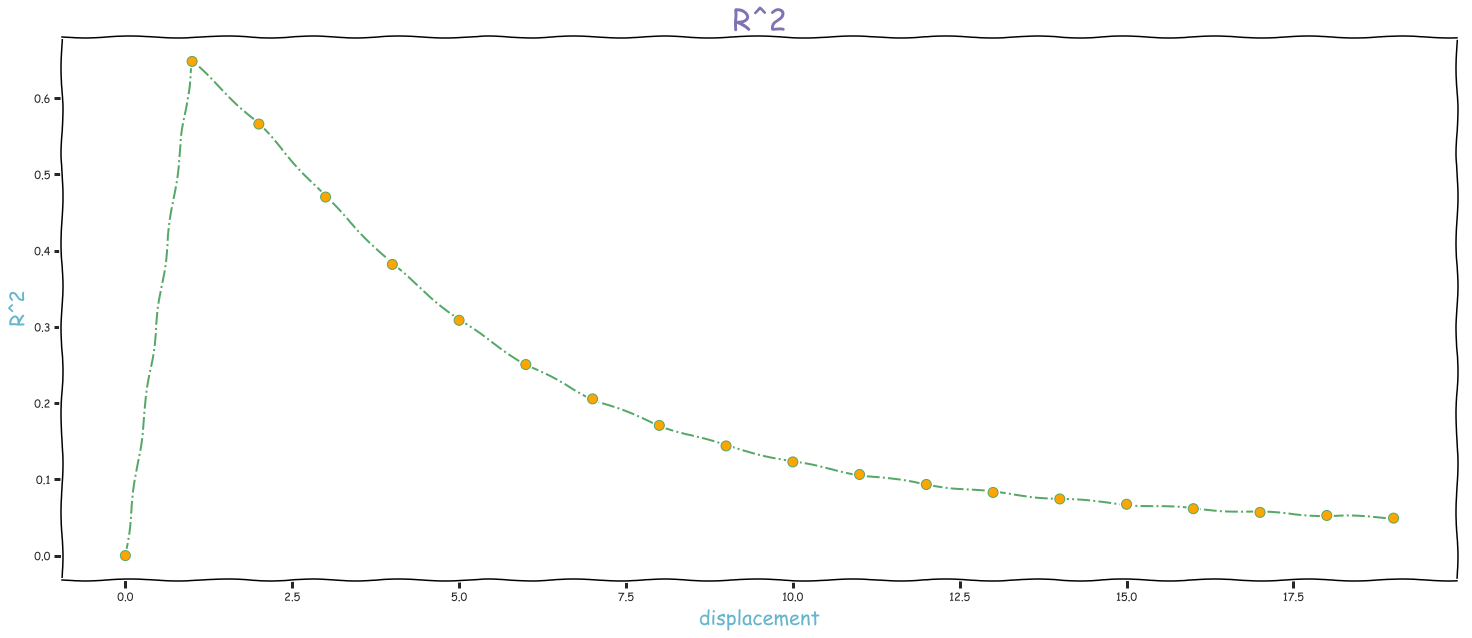

In [257]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.plot(SCOREdf, color='g', ls = '-.', marker='o', markerfacecolor='orange', markersize=10)
plt.title("R^2", fontsize=30, color='m')
plt.xlabel("displacement", fontsize=20, color='c')
plt.ylabel("R^2", fontsize=20, color='c')

In [258]:
X = Auto[['weight']]
y = Auto.mpg
df = pd.DataFrame()
MSEdf = pd.DataFrame()
anova_table = []
SCORE = []

for k in range(0,20):
    X_k = X**k
    dfX = df.append(X_k)
    df_a = np.array(dfX)
    lmk = LinearRegression().fit(df_a, y)
    err = pd.DataFrame([mean_squared_error(y, lmk.predict(df_a))])
    MSEdf = MSEdf.append(err)
    anova_table.append(f_classif(df_a, y))
    SCORE.append(lmk.score(df_a, y))
    
MSEdf.columns = ['MSE']
MSEdf.reset_index(drop=True, inplace=True)

anovadf = pd.DataFrame(anova_table)
anovadf.columns = ['f-value', 'p-value']

SCOREdf = pd.DataFrame(SCORE)
SCOREdf.columns = ['R^2']
SCOREdf.reset_index(drop=True, inplace=True)

Text(0,0.5,'MSE')

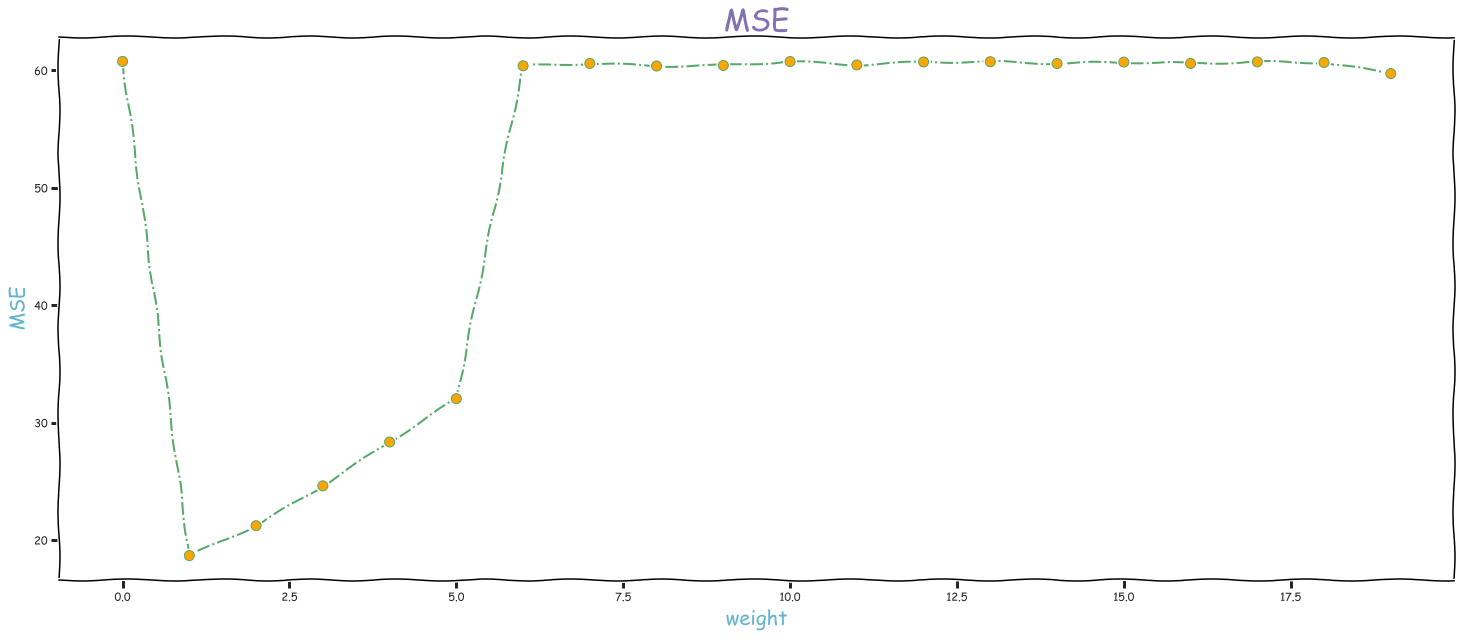

In [259]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.plot(MSEdf, color='g', ls = '-.', marker='o', markerfacecolor='orange', markersize=10)
plt.title("MSE", fontsize=30, color='m')
plt.xlabel("weight", fontsize=20, color='c')
plt.ylabel("MSE", fontsize=20, color='c')

In [260]:
anovadf = pd.DataFrame(anova_table)
anovadf.columns = ['f-value', 'p-value']
anovadf

,f-value,p-value
0,[nan],[nan]
1,[14.873046880608884],[9.026467862761181e-73]
2,[14.026355398365983],[5.0210992487929735e-70]
3,[12.221192914307483],[1.0515203259353823e-63]
4,[10.221146815983198],[8.325870641915164e-56]
5,[8.456123391299439],[7.62237218164662e-48]
6,[0.8617600655741853],[0.8273762573342435]
7,[0.8070950291372976],[0.9133568110196889]
8,[0.896129105720436],[0.7557625856566498]
9,[1.3026809637300725],[0.03846527768296285]


Text(0,0.5,'R^2')

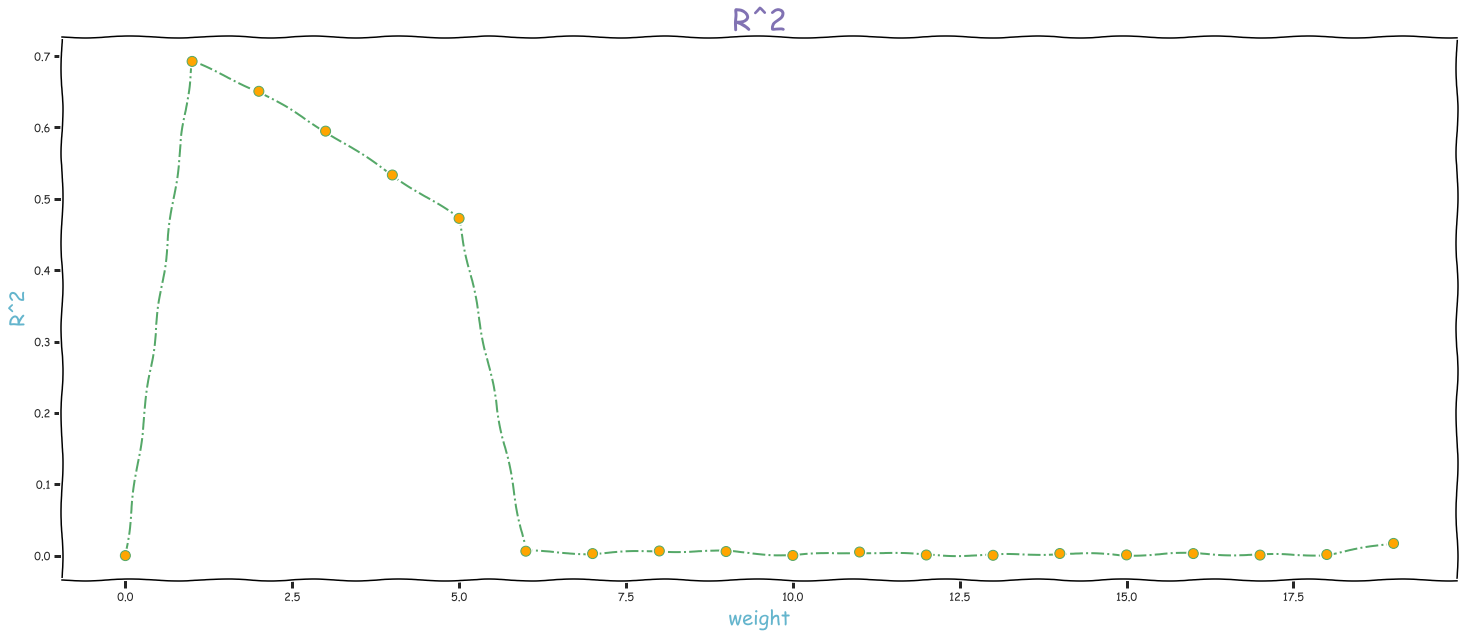

In [261]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.plot(SCOREdf, color='g', ls = '-.', marker='o', markerfacecolor='orange', markersize=10)
plt.title("R^2", fontsize=30, color='m')
plt.xlabel("weight", fontsize=20, color='c')
plt.ylabel("R^2", fontsize=20, color='c')

In [262]:
X = Auto[['acceleration']]
y = Auto.mpg
df = pd.DataFrame()
MSEdf = pd.DataFrame()
anova_table = []
SCORE = []

for k in range(0,20):
    X_k = X**k
    dfX = df.append(X_k)
    df_a = np.array(dfX)
    lmk = LinearRegression().fit(df_a, y)
    err = pd.DataFrame([mean_squared_error(y, lmk.predict(df_a))])
    MSEdf = MSEdf.append(err)
    anova_table.append(f_classif(df_a, y))
    SCORE.append(lmk.score(df_a, y))
    
MSEdf.columns = ['MSE']
MSEdf.reset_index(drop=True, inplace=True)

anovadf = pd.DataFrame(anova_table)
anovadf.columns = ['f-value', 'p-value']

SCOREdf = pd.DataFrame(SCORE)
SCOREdf.columns = ['R^2']
SCOREdf.reset_index(drop=True, inplace=True)

Text(0,0.5,'MSE')

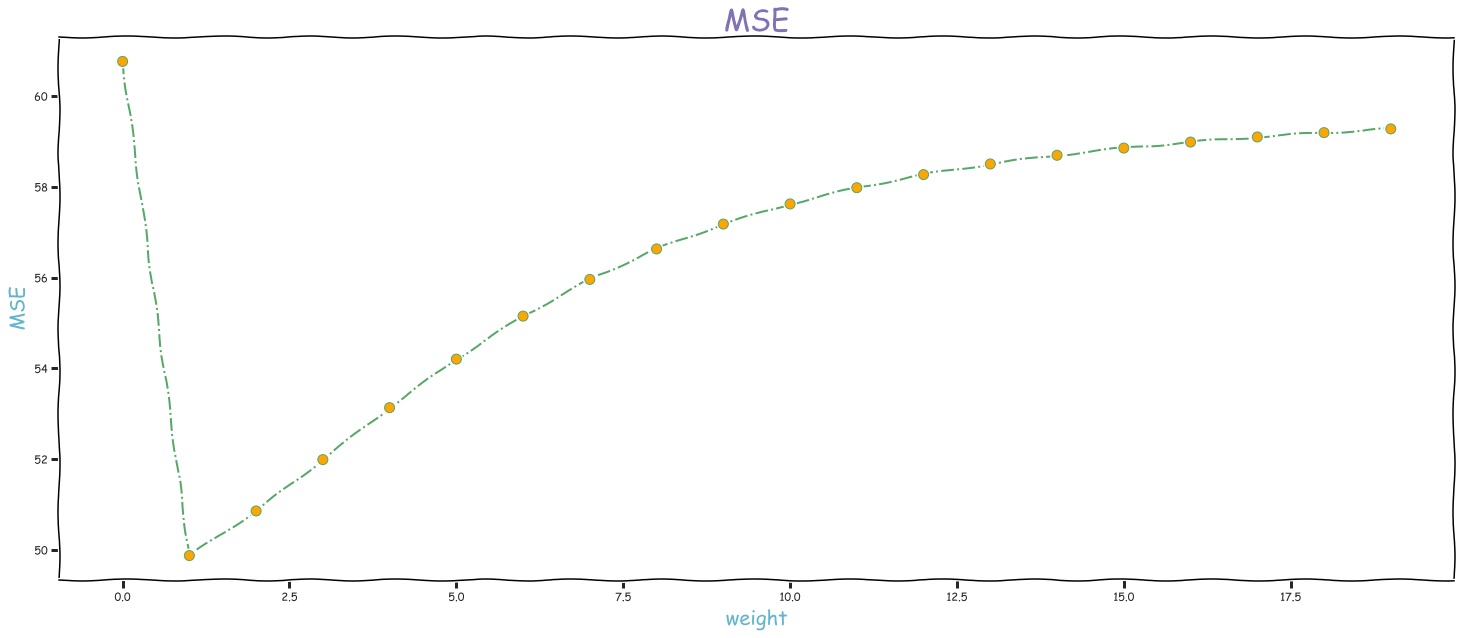

In [263]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.plot(MSEdf, color='g', ls = '-.', marker='o', markerfacecolor='orange', markersize=10)
plt.title("MSE", fontsize=30, color='m')
plt.xlabel("weight", fontsize=20, color='c')
plt.ylabel("MSE", fontsize=20, color='c')

In [264]:
anovadf = pd.DataFrame(anova_table)
anovadf.columns = ['f-value', 'p-value']
anovadf

,f-value,p-value
0,[nan],[nan]
1,[1.940317492327217],[3.714467727285671e-06]
2,[1.9173734420315371],[5.434315520798926e-06]
3,[1.8981480559904111],[7.462595083705315e-06]
4,[1.9047691257798431],[6.69156830934114e-06]
5,[1.946424975801536],[3.3555020535278057e-06]
6,[2.0230142392540387],[9.274323846447297e-07]
7,[2.128613833680738],[1.5290422385221173e-07]
8,[2.2542286531947506],[1.7319857369954107e-08]
9,[2.3899499356595113],[1.6010692488707271e-09]


Text(0,0.5,'R^2')

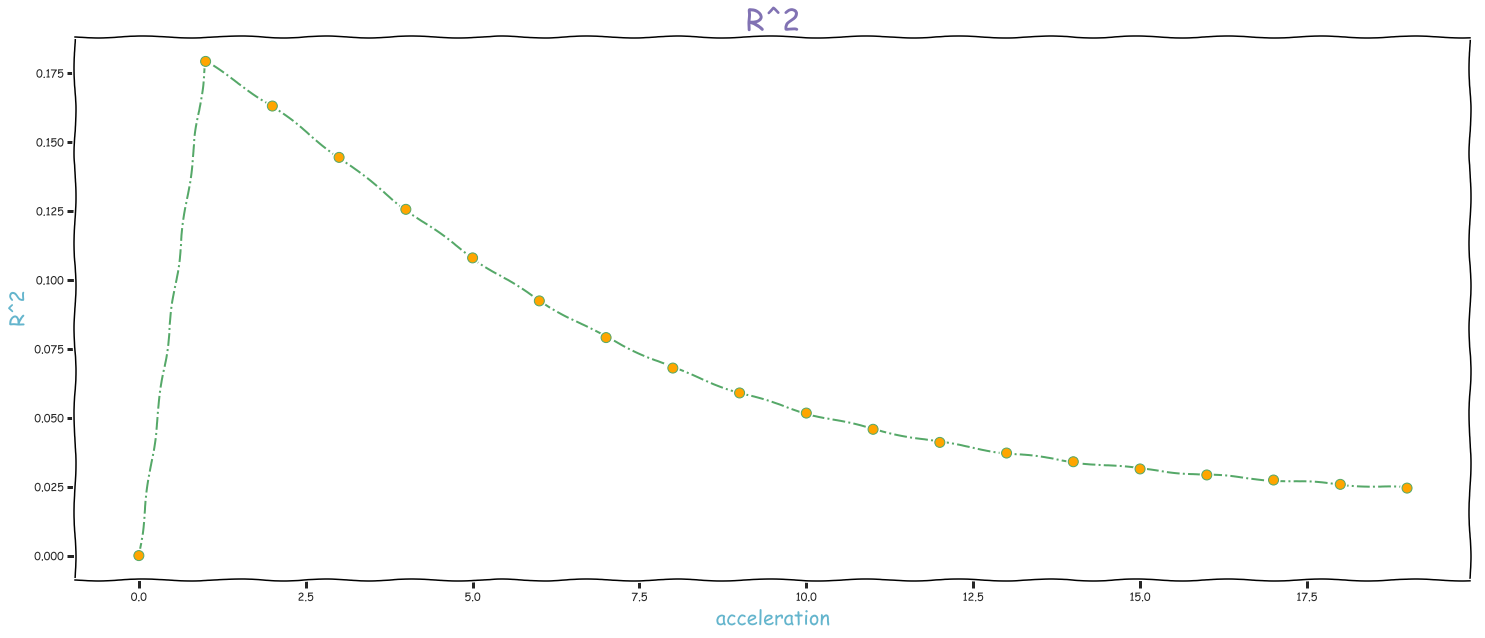

In [265]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.plot(SCOREdf, color='g', ls = '-.', marker='o', markerfacecolor='orange', markersize=10)
plt.title("R^2", fontsize=30, color='m')
plt.xlabel("acceleration", fontsize=20, color='c')
plt.ylabel("R^2", fontsize=20, color='c')

**There doesn't appear to be any non-linear relationship between mpg and other regressors (as evidenced by the fact that the lowest MSE and highest $R^2$**